In [1]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle as pkl
from matplotlib.ticker import (LogLocator)
from IPython.display import HTML
mpl.rcParams.update({'font.size': 14})

In [3]:
filename = 'test_easy_equation_Beta0'

# Load PINN outputs
with open('pickles/pinn_loss_' + filename + '.pkl', 'rb') as file:
    pinn_loss = pkl.load(file)
    
with open('pickles/boundary_loss_' + filename + '.pkl', 'rb') as file:
    boundary_loss = pkl.load(file)
    
with open('pickles/predictions_' + filename + '.pkl', 'rb') as file:
    predictions = pkl.load(file)

In [4]:
# Get properties
size = int(np.sqrt(predictions.shape[0]))
epochs = int(predictions.shape[2])

# Take out of logspace
predictions = np.exp(predictions)

final_predict = predictions[:, :, -1].reshape((size, size))
# final_predict = np.exp(final_predict)

In [6]:
size = 512 # size of r, T, p, and f_boundary
x_limits = [1, 10]
y_limits = [1, 10]

# Create data
x = np.logspace(np.log10(x_limits[0]), np.log10(x_limits[1]), size).flatten()[:, None]
y = np.logspace(np.log10(y_limits[0]), np.log10(y_limits[1]), size).flatten()[:, None]
f_boundary = x**2 + 100 
f = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        f[i, j] = x[i]**2 + y[j]**2

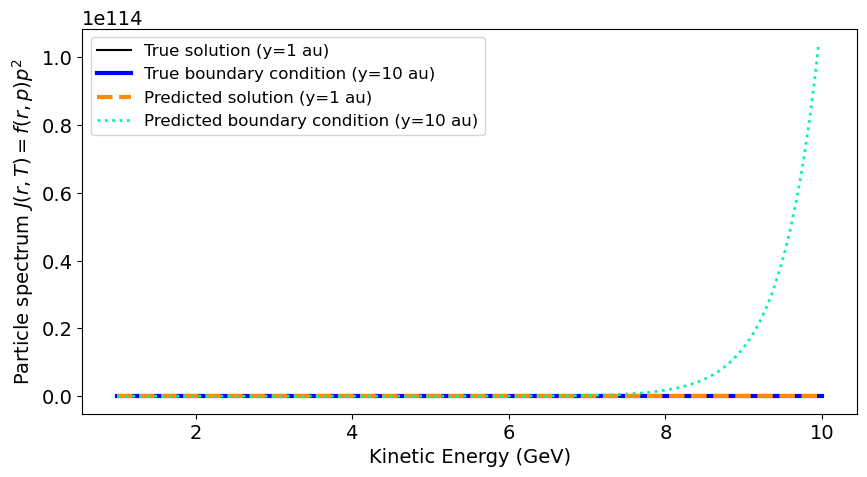

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, f[:, 0], label=f'True solution (y={y[0, 0]:.0f} au)', c='k')
ax.plot(x, f[:, -1], label=f'True boundary condition (y={y[-1, 0]:.0f} au)', c='blue', lw='3')
ax.plot(x[:-1], np.expand_dims(final_predict[0, :-1], axis=1), label=f'Predicted solution (y={y[0, 0]:.0f} au)', c='darkorange', lw='3', ls='--')
ax.plot(x[:-1], np.expand_dims(final_predict[-1, :-1], axis=1), label=f'Predicted boundary condition (y={y[-1, 0]:.0f} au)', c='mediumspringgreen', lw='2', ls=':')

ax.set_xlabel("Kinetic Energy (GeV)")
ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
# ax.set_ylim(0, 500)
ax.legend(prop={'size': 12})

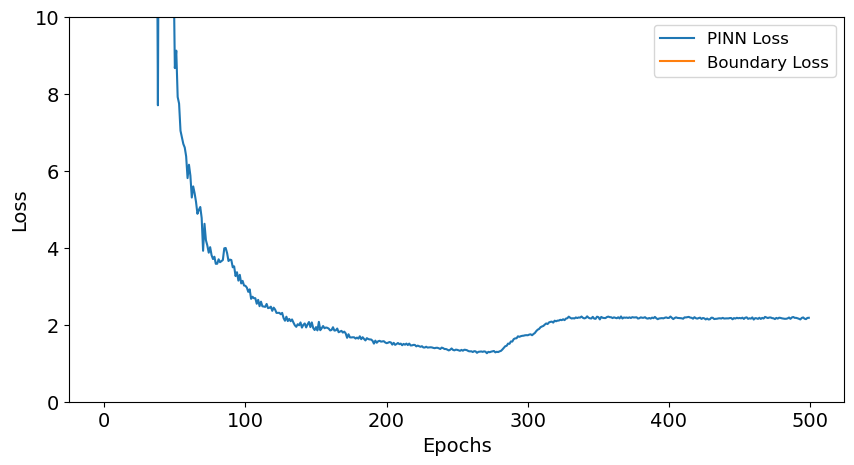

In [18]:
# Plot loss 
fig = plt.figure(figsize=(10, 5))

plt.plot(pinn_loss, label='PINN Loss')
plt.plot(boundary_loss, label='Boundary Loss')

plt.ylim(0, 10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(prop={'size': 12})
plt.savefig("loss.png")